# Приложения выпуклой оптимизации
(основано на примерах к CVXPY, [ссылка](https://www.cvxpy.org/examples/index.html))

In [1]:
import numpy as np
import cvxpy as cvx
import matplotlib.pyplot as plt
plt.rc("text", usetex=True)

## Удаление шума

- Изображение
- Звук

### Изображение

In [2]:
from PIL import Image

# np.random.seed(1)
# Load image
orig_img = Image.open("./kandinskiy_comp_viii.jpg")
# orig_img = Image.open("./lena_small.jpg")

# Convert to arrays
Uorig = np.array(orig_img)
rows, cols, colors = Uorig.shape
print(Uorig.shape)

# Known is 1 if the pixel is known,
# 0 if the pixel was corrupted
# The Known matrix is initialized randomly
Known = np.zeros((rows, cols, colors))
for i in range(rows):
    for j in range(cols):
        if np.random.random() > 0.7:
            for k in range(colors):
                Known[i, j, k] = 1

Ucorr = Known * Uorig
corr_img = Image.fromarray(np.uint8(Ucorr))

(425, 640, 3)


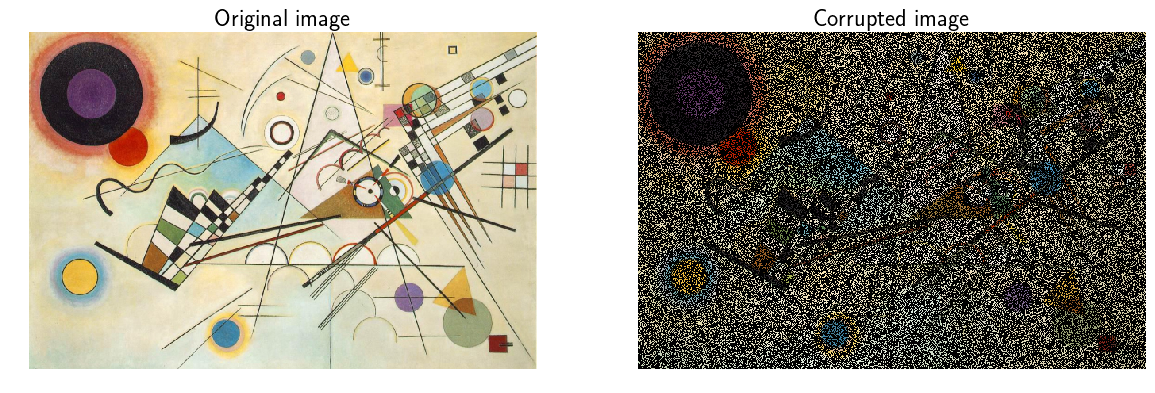

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(20, 20))
ax[0].imshow(orig_img);
ax[0].set_title("Original image", fontsize=24)
ax[0].axis('off')
ax[1].imshow(corr_img);
ax[1].set_title("Corrupted image", fontsize=24)
ax[1].axis('off');

In [4]:
# Define variables and constraints
variables = []
constraints = []
for i in range(colors):
    U = cvx.Variable(shape=(rows, cols))
    variables.append(U)
    constraints.append(cvx.multiply(Known[:, :, i], U) == cvx.multiply(Known[:, :, i], Ucorr[:, :, i]))

In [5]:
prob = cvx.Problem(cvx.Minimize(cvx.tv(*variables)), constraints)
prob.solve(verbose=True, solver="SCS")

WARN: A->p (column pointers) not strictly increasing, column 542935 empty
WARN: A->p (column pointers) not strictly increasing, column 814935 empty
WARN: A->p (column pointers) not strictly increasing, column 1086935 empty
----------------------------------------------------------------------------
	SCS v1.2.6 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2016
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 3766848, CG tol ~ 1/iter^(2.00)
eps = 1.00e-03, alpha = 1.50, max_iters = 2500, normalize = 1, scale = 1.00
Variables n = 1086936, constraints m = 2712552
Cones:	primal zero / dual free vars: 816000
	soc vars: 1896552, soc blks: 270936
Setup time: 2.33e-01s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
    

4566605.756053854

In [6]:
# Load variables values into array
rec_arr = np.zeros((rows, cols, colors), dtype=np.uint8)
for i in range(colors):
    rec_arr[:, :, i] = variables[i].value

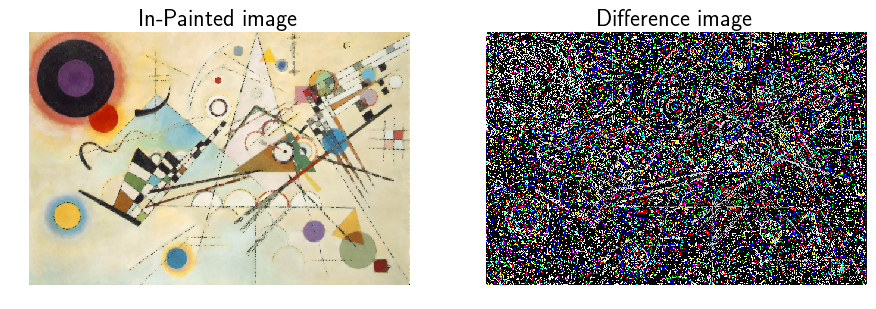

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
img_rec = Image.fromarray(rec_arr)
ax[0].imshow(img_rec);
ax[0].set_title("In-Painted image", fontsize=24)
ax[0].axis('off')

img_diff = Image.fromarray(np.abs(Uorig - rec_arr))
ax[1].imshow(img_diff);
ax[1].set_title("Difference image", fontsize=24)
ax[1].axis('off');

### Звук